# Part II - (FordGo BikeTrip Data)
## by (Adeniya Adenike)





## Overview

For this presentation,we will examine the Ford GoBike System Dataset in this lecture.





## Dataset Overview

>The original dataset had 18341 entries & 16 columns. After the data was cleaned with
the removal of na, the dataset reduced to 174952 entries and 16 colums.

>The last two columns are discrete features and the first one is a continuos feature.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns;

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trip_data= pd.read_csv('tripdata.csv')
trip_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
155323,404,2019-02-06 08:55:24.5820,2019-02-06 09:02:09.0640,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4780,Subscriber,1993.0,Male,No
2308,454,2019-02-28 18:12:03.9420,2019-02-28 18:19:38.6070,36.0,Folsom St at 3rd St,37.783830,-122.398870,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5544,Subscriber,1962.0,Male,No
72038,653,2019-02-19 16:55:51.9690,2019-02-19 17:06:45.1810,343.0,Bryant St at 2nd St,37.783172,-122.393572,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6122,Customer,NaN,NaN,No
177272,2501,2019-02-01 23:39:49.3310,2019-02-02 00:21:30.3840,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,304.0,Jackson St at 5th St,37.348759,-121.894798,3916,Subscriber,1991.0,Male,No
94666,360,2019-02-15 16:05:23.7470,2019-02-15 16:11:24.2560,101.0,15th St at Potrero Ave,37.767079,-122.407359,223.0,16th St Mission BART Station 2,37.764765,-122.420091,6153,Subscriber,1996.0,Male,No


In [3]:
# helper function

def label(x, y, t):
    """
    Args:
    x (str): x-axis label
    y (str): y-axis label
    t (str): plot title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    
    plt.show()

## Duration Distribution

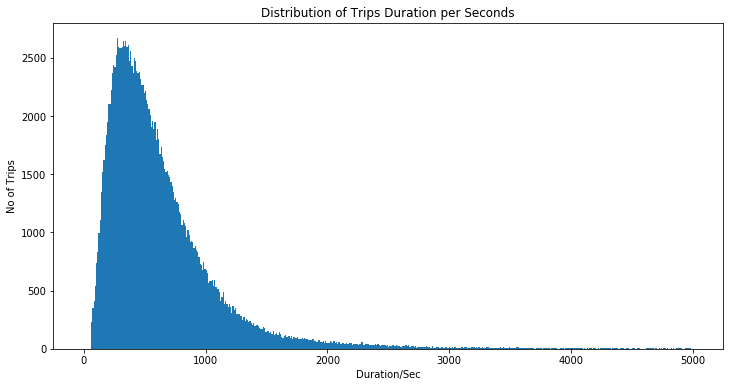

In [4]:
# start with trip duration histogram
binsize = 10
xlim = 10000 / 2 # seconds
bins = np.arange(0, xlim+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
label(x='Duration/Sec', y='No of Trips', t='Distribution of Trips Duration per Seconds')

**It will be better to use log scale instead of limitaions**

## Scaled Distribution


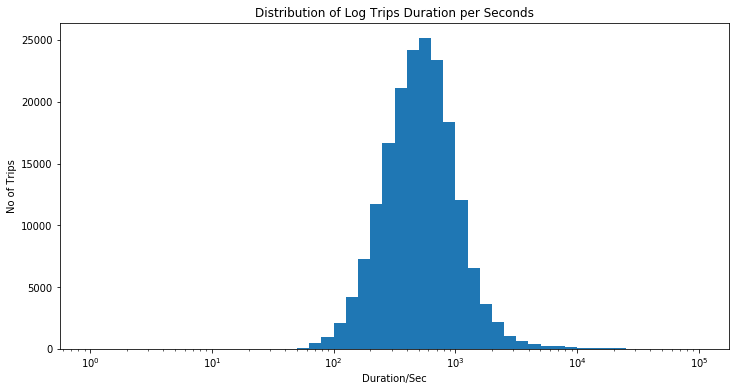

In [5]:
# log trip duration histogram
bins = 10 ** np.arange(0, np.log10(trip_data['duration_sec'].max())+0.1, 0.1)

plt.figure(figsize=(12, 6))
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xscale('log')

label(x='Duration/Sec', y='No of Trips', t='Distribution of Log Trips Duration per Seconds')

> **Distribution are symmetric with peak value at 500 second ~(about 8 minutes) which reasonable for a short rides.**

In [6]:
bike_counts = trip_data['bike_share_for_all_trip'].value_counts()
bike_counts

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

## Bike Share and User Type

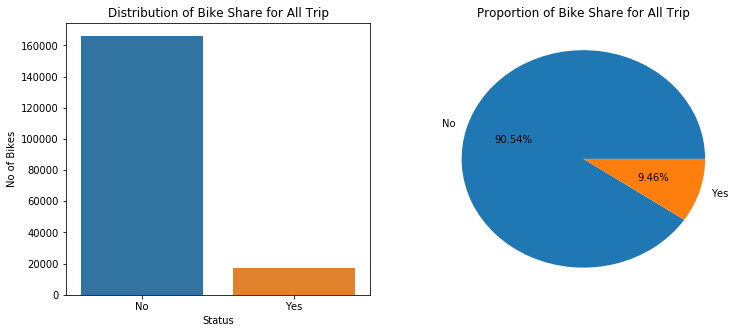

In [7]:
# let's now show no of bike_share_for_all_trip

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
sns.countplot(data = trip_data, x = 'bike_share_for_all_trip')

plt.title('Distribution of Bike Share for All Trip')
plt.ylabel('No of Bikes')
plt.xlabel('Status')

plt.subplot(1, 2, 2)
plt.pie(bike_counts, labels = bike_counts.index, autopct='%1.2f%%')
plt.title('Proportion of Bike Share for All Trip')

plt.show()

> **The following figure show that +90% of users does not share the bikes for all trip.**

In [8]:
user_counts = trip_data['user_type'].value_counts()
user_counts

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

## Distribution of User Type

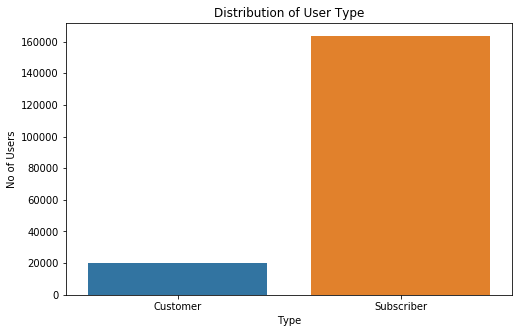

In [9]:
# let's now show no of user_type

plt.figure(figsize=[8, 5])

sns.countplot(data = trip_data, x = 'user_type')
label(x='Type', y='No of Users', t='Distribution of User Type')

>**The following figure shows that +90% of users are subscribers and only +9% are customers.**

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 350163 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/